In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#Download if runtime restarted
! pip install urduhack[tf-gpu]
import urduhack
urduhack.download()
!pip install git+https://github.com/LIAAD/yake 
#!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached importlib_metadata-5.0.0-py3-none-any.whl (21 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.1
    Uninstalling importlib-metadata-3.10.1:
      Successfully uninstalled importlib-metadata-3.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
konoha 4.6.5 requires importlib-metadata<4.0.0,>=3.7.0, but you have importlib-metadata 5.0.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-8klwniuu
  Running command git clone -q https://github.com/LIAAD/yake /tmp/pip-req-build-8klwniuu


In [ ]:
from wordcloud import WordCloud

In [ ]:
!pip install --upgrade arabic-reshaper
!pip install --upgrade arabic-reshaper python-bidi pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
urdu_news= pd.read_csv('/content/Data Labels.csv')

In [ ]:
english_news=pd.read_csv('/content/English headlines translated.csv')
df_en=english_news.copy()

In [ ]:
df_en.head()

,Date,News Headlines,Class,labels,lemmatized_text,english translation
0,14/04/2018,ملک میں تھری فور جی صارفین کی تعداد کروڑ سے مت...,Positive,4,ملک میں تھری فور جی صارفین کی تعداد کروڑ سے مت...,The number of 3G users in the country exceeds ...
1,08/06/2012,گورنر سٹیٹ بنک اور وزیر خزانہ مارک اپ کی شرح س...,Negative,2,گورنر سٹیٹ بنک اور وزیر خزانہ مارک اپ کی شرح س...,Governor State Bank and Finance Minister Marku...
2,22/08/2016,مرسڈیز کی نئی کانسیپٹ گاڑی متعارف,Positive,4,مرسڈیز کی نئی کانسیپٹ گاڑی متعارف,Introducing Mercedes's new concept vehicle
3,25/08/2018,پاکستان کو سی پیک کی وجہ سے بیرونی دباو کا سام...,Neutral,0,پاکستان کو سی پیک کی وجہ سے بیرونی دباو کا سام...,Pakistan faces external pressure due to SeaPeak
4,20/02/2014,کراچی اسٹاک ایکسچینج کی تیزی کوبریک لگ گیاایک ...,Negative,2,کراچی اسٹاک ایکسچینج کی تیزی کوبریک لگ گیاایک ...,Karachi Stock Exchange's sharp ferrication dec...


In [ ]:
df=urdu_news.copy()

## **Data Pre-processing**

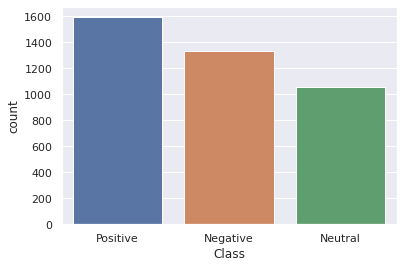

In [ ]:
sns.countplot(x='Class', data=urdu_news);

In [ ]:
df.groupby('Class').describe()

labels                                    Unnamed: 4       ...  \
           count mean  std  min  25%  50%  75%  max      count mean  ...   
Class                                                                ...   
Negative  1332.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0        0.0  NaN  ...   
Neutral   1060.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  NaN  ...   
Positive  1593.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0        0.0  NaN  ...   

         Unnamed: 5     Unnamed: 6                               
                75% max      count mean std min 25% 50% 75% max  
Class                                                            
Negative        NaN NaN        0.0  NaN NaN NaN NaN NaN NaN NaN  
Neutral         NaN NaN        0.0  NaN NaN NaN NaN NaN NaN NaN  
Positive        NaN NaN        0.0  NaN NaN NaN NaN NaN NaN NaN  

[3 rows x 32 columns]

In [ ]:
df["Class"].value_counts()

Positive    1593
Negative    1332
Neutral     1060
Name: Class, dtype: int64

In [ ]:
urdu_news.isnull().sum().reset_index()

,index,0
0,Date,0
1,News Headlines,0
2,Class,0
3,labels,0
4,Unnamed: 4,3985
5,Unnamed: 5,3985
6,Unnamed: 6,3985


In [ ]:
df['Date']=df['Date'].str.replace('/', '-')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,News Headlines,Class,labels,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2021-01-02,اسٹاک مارکیٹ نئے کلینڈر سال کے پہلے دن تیزی ان...,Positive,4,NaN,NaN,NaN
1,2020-12-25,حکومت شعبہ زراعت کی ترقی کیلئے کوشاں ہے غلام ع...,Positive,4,NaN,NaN,NaN
2,2020-12-21,غیر قانونی کنڈ چلانے کی ہرگز اجازت نہیں دی جائ...,Positive,4,NaN,NaN,NaN
3,2020-12-17,سٹاک مارکیٹ میں تیزی سرمایہ کاری مالیت 22ارب11...,Positive,4,NaN,NaN,NaN
4,2020-12-15,خواتین تاجروں کیلئے جلد ای پورٹل کا اغاز کریں ...,Positive,4,NaN,NaN,NaN


### URDU HACK

In [ ]:
import urduhack
from urduhack.normalization import normalize, normalize_characters, normalize_combine_characters, remove_diacritics
from urduhack.preprocessing import preprocess, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols,digits_space, normalize_whitespace

**Text normalization for label dataset**

In [ ]:
# Text Normalization
df['News Headlines'] = df['News Headlines'].apply(normalize)
df['News Headlines'] = df['News Headlines'].apply(replace_numbers)
# Text normalize characters
df['News Headlines'] = df['News Headlines'].apply(normalize_characters)

# Text normalize combined characters
df['News Headlines'] = df['News Headlines'].apply(normalize_combine_characters)

# remove_diacritics
df['News Headlines'] = df['News Headlines'].apply(remove_diacritics)

df['News Headlines'] = df['News Headlines'].apply(normalize_whitespace) 


**Text normalization for large dataset**

**Label Dataset preprocessing**


In [ ]:
df['News Headlines'] = df['News Headlines'].apply(preprocess) 
df['News Headlines'] = df['News Headlines'].apply(remove_punctuation) 
df['News Headlines'] = df['News Headlines'].apply(remove_accents)
df['News Headlines'] = df['News Headlines'].apply(replace_urls) 
df['News Headlines'] = df['News Headlines'].apply(replace_emails) 
df['News Headlines'] = df['News Headlines'].apply(replace_currency_symbols) 
df['News Headlines'] = df['News Headlines'].apply(normalize_whitespace) 
df['News Headlines'] = df['News Headlines'].apply(digits_space)

**Large news headlines preprocessing**

**Large news text preprocessing**

In [ ]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "
    
    return lemme_str

In [ ]:
df['lemmatized_text'] = df['News Headlines'].apply(lemitizeStr)

### Tokenization

## **Keyword Extraction & Visualization**

In [ ]:
import yake

In [ ]:
sample_post= df['lemmatized_text']
sample_post= ' '.join(map(str,sample_post))

In [ ]:
positive_news= df.loc[df['Class'] == "Positive"]
positive_news=positive_news['lemmatized_text']
positive_news= ' '.join(map(str,positive_news)) 
negative_news= df.loc[df['Class'] == "Negative"]
negative_news=negative_news['lemmatized_text']
negative_news= ' '.join(map(str,negative_news)) 
neutral_news= df.loc[df['Class'] == "Neutral"]
neutral_news=neutral_news['lemmatized_text']
neutral_news= ' '.join(map(str,neutral_news)) 

In [ ]:
sample_post= df['lemmatized_text']
sample_post= ' '.join(map(str,sample_post))

In [ ]:
positive_news= df.loc[df['Class'] == "Positive"]
positive_news=positive_news['lemmatized_text']
positive_news= ' '.join(map(str,positive_news)) 
negative_news= df.loc[df['Class'] == "Negative"]
negative_news=negative_news['lemmatized_text']
negative_news= ' '.join(map(str,negative_news)) 
neutral_news= df.loc[df['Class'] == "Neutral"]
neutral_news=neutral_news['lemmatized_text']
neutral_news= ' '.join(map(str,neutral_news))

In [ ]:
df_en.head(5)

,Date,News Headlines,Class,labels,lemmatized_text,english translation
0,14/04/2018,ملک میں تھری فور جی صارفین کی تعداد کروڑ سے مت...,Positive,4,ملک میں تھری فور جی صارفین کی تعداد کروڑ سے مت...,The number of 3G users in the country exceeds ...
1,08/06/2012,گورنر سٹیٹ بنک اور وزیر خزانہ مارک اپ کی شرح س...,Negative,2,گورنر سٹیٹ بنک اور وزیر خزانہ مارک اپ کی شرح س...,Governor State Bank and Finance Minister Marku...
2,22/08/2016,مرسڈیز کی نئی کانسیپٹ گاڑی متعارف,Positive,4,مرسڈیز کی نئی کانسیپٹ گاڑی متعارف,Introducing Mercedes's new concept vehicle
3,25/08/2018,پاکستان کو سی پیک کی وجہ سے بیرونی دباو کا سام...,Neutral,0,پاکستان کو سی پیک کی وجہ سے بیرونی دباو کا سام...,Pakistan faces external pressure due to SeaPeak
4,20/02/2014,کراچی اسٹاک ایکسچینج کی تیزی کوبریک لگ گیاایک ...,Negative,2,کراچی اسٹاک ایکسچینج کی تیزی کوبریک لگ گیاایک ...,Karachi Stock Exchange's sharp ferrication dec...


In [ ]:
sample_post_en= df_en['english translation']
sample_post_en= ' '.join(map(str,sample_post_en))
positive_news_en= df_en.loc[df['Class'] == "Positive"]
positive_news_en=positive_news_en['english translation']
positive_news_en= ' '.join(map(str,positive_news_en)) 
negative_news_en= df_en.loc[df['Class'] == "Negative"]
negative_news_en=negative_news_en['english translation']
negative_news_en= ' '.join(map(str,negative_news_en)) 
neutral_news_en= df_en.loc[df['Class'] == "Neutral"]
neutral_news_en=neutral_news_en['english translation']
neutral_news_en= ' '.join(map(str,neutral_news_en))

In [ ]:
#function for keyword extraction
language='ur'
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 500
custom_kw_extractor = yake.KeywordExtractor(lan='language', n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo,top=numOfKeywords, windowsSize=windowSize, features=None)
def keyword_extract(sentence):  
    sentences=" "    
    keywords = custom_kw_extractor.extract_keywords(sentence)
    for word,number in keywords:
       sentences+= word + " "
    return sentences

In [ ]:
#function for keyword extraction
language='en'
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 500
custom_kw_extractor = yake.KeywordExtractor(lan='language', n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo,top=numOfKeywords, windowsSize=windowSize, features=None)
def keyword_extract(sentence):  
    sentences=" "    
    keywords = custom_kw_extractor.extract_keywords(sentence)
    for word,number in keywords:
       sentences+= word + " "
    return sentences

In [ ]:
overall_keywords_en=keyword_extract(sample_post_en)
positive_keywords_en=keyword_extract(positive_news_en)
negative_keywords_en=keyword_extract(negative_news_en)
neutral_keywords_en=keyword_extract(neutral_news_en)

In [ ]:
overall_keywords=keyword_extract(sample_post)
positive_keywords=keyword_extract(positive_news)

In [ ]:
negative_keywords=keyword_extract(negative_news)
neutral_keywords=keyword_extract(neutral_news)

In [ ]:
stopwords="""آ آئی آئیں آئے آتا آتی آتے آداب آدھ آدھا آدھی آدھے میں آس
 آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 اتوار ارب اربویں ارے اس میں اسکا اسکی اسکے اسی اسے اف افوہ الاول البتہ
 الثانی الحرام السلام الف المکرم ان اندر انکا انکی انکے انہوں انہی انہیں
 اوئے اور اوپر اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکبر اکثر اگر اگرچہ
 اگست اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر بج بجے
 بخیر برسات بشرطیکہ بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں
 بھی بہار بہت بہتر بیگم تاکہ تاہم تب تجھ تجھی تجھے ترا تری
 تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے
 تہائی تیرا تیری تیرے تین جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے
 جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے جیٹھ حالانکہ حالاں حصہ حضرت خاطر خالی خدا خزاں خواہ خوب
 خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوشنبہ دوں دکھائیں دگنا دی
 دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے
 رکھا رکھتا رکھتی رکھتے رکھنا رکھنی رکھنے رکھو رکھی رکھے رہ رہا رہتا
 رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سلام سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شام شاید
 شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین فروری فقط فلاں
 فی قبل قطا لائی لائے لاتا لاتی لاتے لانا لانی لایا لو لوجی لوگوں
 لگ لگا لگتا لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن
 لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محترمی محض مرا مرحبا
 مری مرے مزید مس مسز مسٹر مطابق مطلق مل منٹ منٹوں مکرمی مگر
 مگھر مہربانی میرا میروں میری میرے میں نا نزدیک نما نو نومبر نہ نہیں
 نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ
 وعلیکم وغیرہ ولے وگرنہ وہ وہاں وہی وہیں ویسا ویسے ویں پاس
 پایا پر پس پلیز پون پونا پونی پونے پھاگن پھر پہ پہر پہلا پہلی
 پہلے پیر پیچھے چاہئے چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ
 چوگنی چکی چکیں چکے چہارشنبہ چیت ڈالنی ڈالنے ڈالے کئے کا کاتک کاش کب
 کبھی کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس
 کسی کسے کل کم کن کنہیں کو کوئی کون کونسا کونسے کچھ کہ کہا
 کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے
 گئی گئے گا گرما گرمی گنا گو گویا گھنٹا گھنٹوں گھنٹے گی گیا
 ہائیں ہائے ہاڑ ہاں ہر ہرچند ہرگز ہزار ہفتہ ہم ہمارا ہماری ہمارے ہمی
 ہمیں ہو ہوئی ہوئیں ہوئے ہوا ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی
 ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں"""

In [ ]:
stop_words='میں'

In [ ]:
wordcloud_overall = WordCloud(width = 800, height = 800, 
                               background_color="white",font_path='/content/NotoNaskhArabic-Regular.ttf',
                               max_words=200,mode="RGBA",repeat=True).generate(overall_keywords)


wordcloud_positive = WordCloud(width = 800, height = 800, 
                               background_color="white",font_path='/content/NotoNaskhArabic-Regular.ttf',
                               max_words=200,mode="RGBA",repeat=True
                               ).generate(positive_keywords)

wordcloud_negative = WordCloud(width = 800, height = 800, 
                               background_color="white",font_path='/content/NotoNaskhArabic-Regular.ttf',
                               max_words=200,mode="RGBA",repeat=True
                               ).generate(negative_keywords)

wordcloud_neutral = WordCloud(width = 800, height = 800, 
                               background_color="white",font_path='/content/NotoNaskhArabic-Regular.ttf',
                               max_words=200,mode="RGBA",repeat=True
                               ).generate(neutral_keywords)

In [ ]:
wordcloud_overall_en = WordCloud(width = 800, height = 800, 
                               background_color="white",
                               max_words=100,mode="RGBA",repeat=True).generate(overall_keywords_en)


wordcloud_positive_en = WordCloud(width = 800, height = 800, 
                               background_color="white",
                               max_words=100,mode="RGBA",repeat=True
                               ).generate(positive_keywords_en)

wordcloud_negative_en = WordCloud(width = 800, height = 800, 
                               background_color="white",
                               max_words=100,mode="RGBA",repeat=True
                               ).generate(negative_keywords_en)

wordcloud_neutral_en = WordCloud(width = 800, height = 800, 
                               background_color="white",
                               max_words=100,mode="RGBA",repeat=True
                               ).generate(neutral_keywords_en)

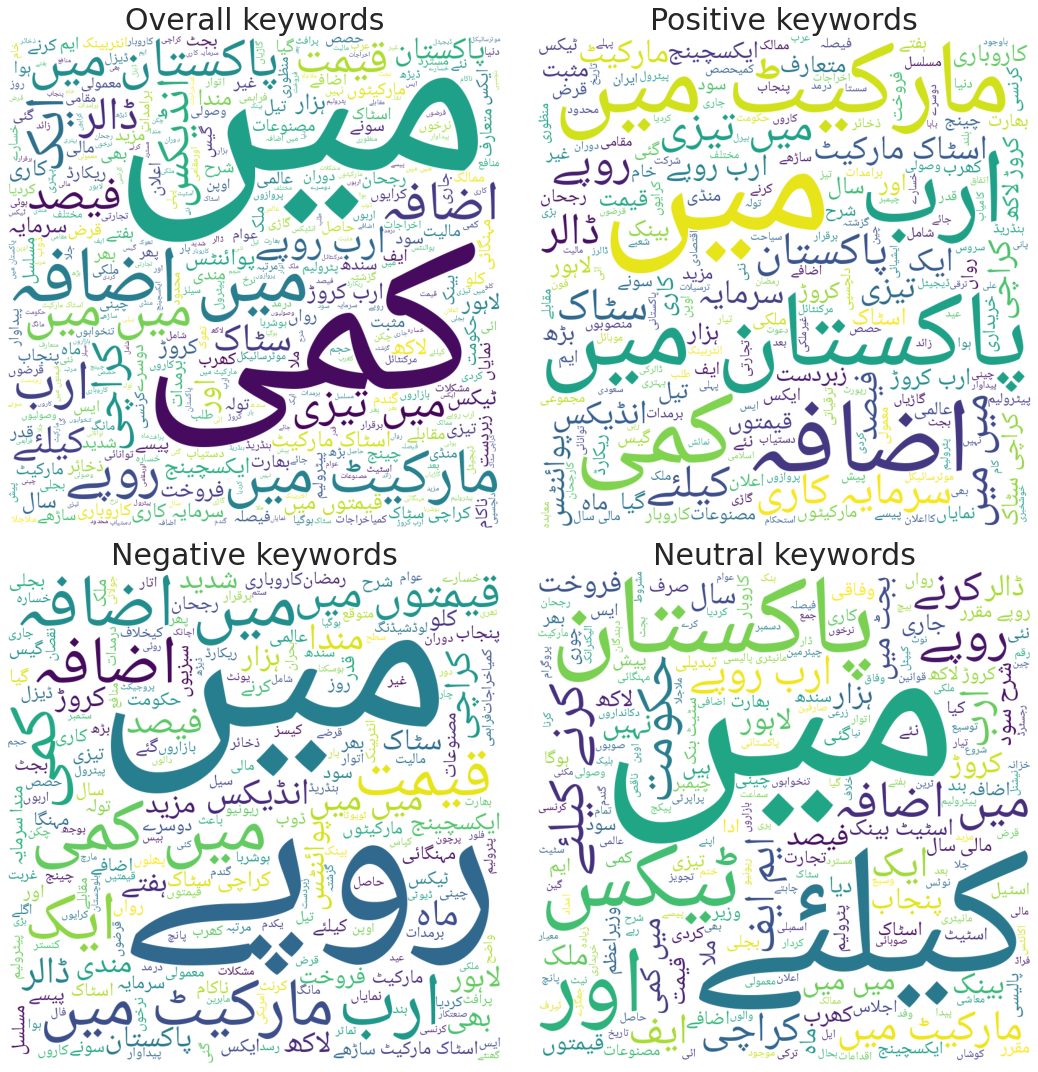

In [ ]:
plt.figure(figsize=(15, 15), facecolor = None)
plt.subplot(2, 2, 1)
plt.imshow(wordcloud_overall)
plt.axis("off")
plt.title('Overall keywords', fontdict={'fontsize': 30})
plt.subplot(2, 2, 2)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.title('Positive keywords', fontdict={'fontsize': 30})
plt.subplot(2, 2, 3)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.title('Negative keywords', fontdict={'fontsize': 30})
plt.subplot(2, 2, 4)
plt.imshow(wordcloud_neutral)
plt.axis("off")
plt.title('Neutral keywords', fontdict={'fontsize': 30})
plt.tight_layout() 
plt.show() 

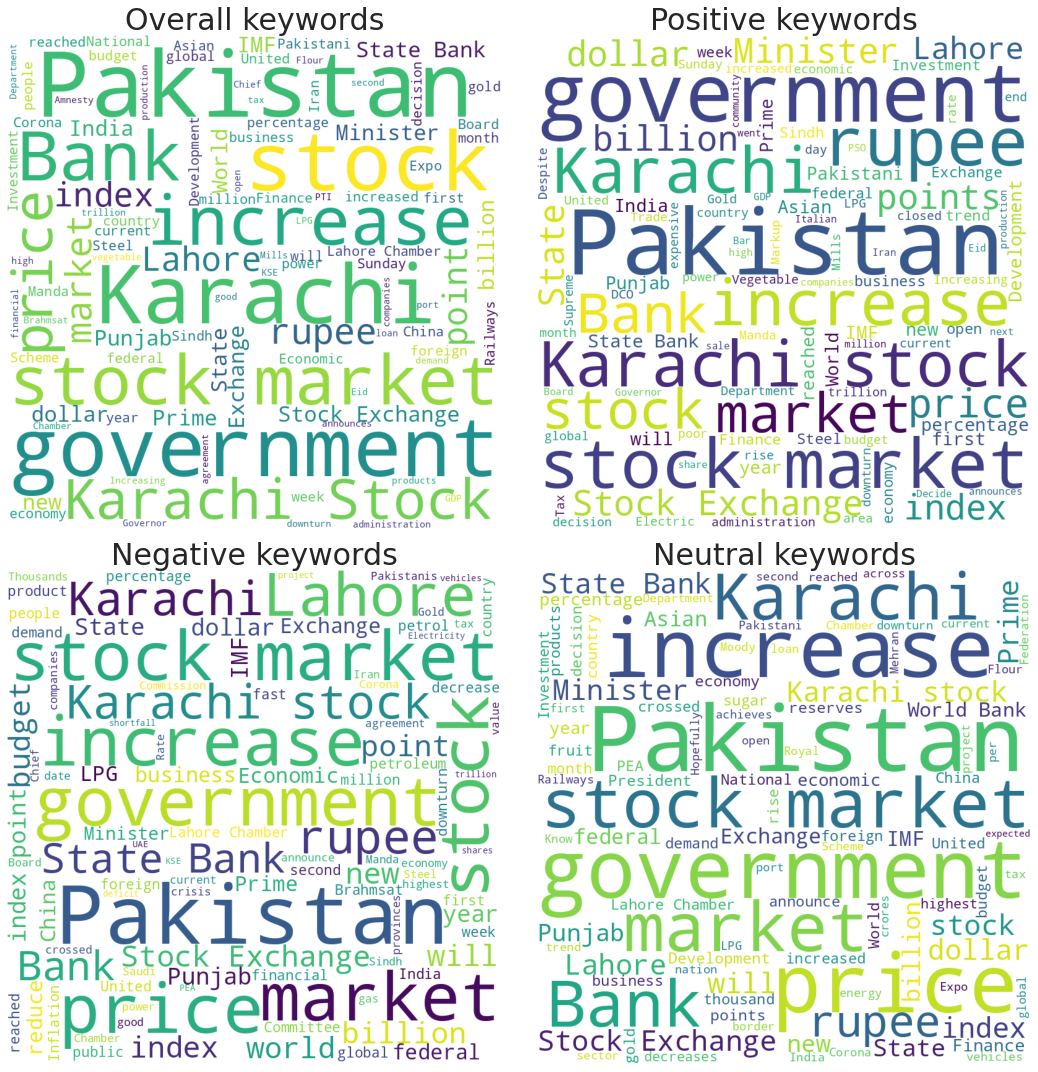

In [ ]:
plt.figure(figsize=(15, 15), facecolor = None)
plt.subplot(2, 2, 1)
plt.imshow(wordcloud_overall_en)
plt.axis("off")
plt.title('Overall keywords', fontdict={'fontsize': 30})
plt.subplot(2, 2, 2)
plt.imshow(wordcloud_positive_en)
plt.axis("off")
plt.title('Positive keywords', fontdict={'fontsize': 30})
plt.subplot(2, 2, 3)
plt.imshow(wordcloud_negative_en)
plt.axis("off")
plt.title('Negative keywords', fontdict={'fontsize': 30})
plt.subplot(2, 2, 4)
plt.imshow(wordcloud_neutral_en)
plt.axis("off")
plt.title('Neutral keywords', fontdict={'fontsize': 30})
plt.tight_layout() 
plt.show() 

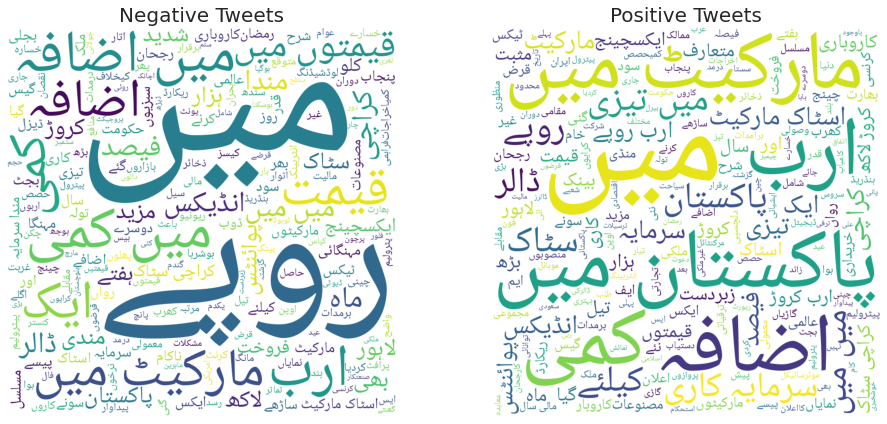

In [ ]:
plt.figure(figsize=(14, 6), facecolor = None)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.title('Negative Tweets', fontdict={'fontsize': 20})

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.title('Positive Tweets', fontdict={'fontsize': 20})

plt.tight_layout() 
plt.show()

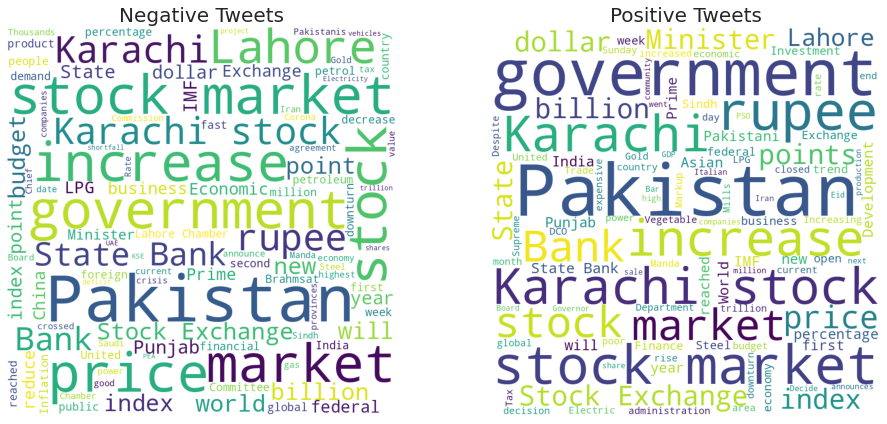

In [ ]:
plt.figure(figsize=(14, 6), facecolor = None)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_negative_en)
plt.axis("off")
plt.title('Negative Tweets', fontdict={'fontsize': 20})

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_positive_en)
plt.axis("off")
plt.title('Positive Tweets', fontdict={'fontsize': 20})

plt.tight_layout() 
plt.show()